In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected = True)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as tts,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix
#data loading


In [6]:
st=pd.read_csv('C:/Users/User/Documents/upskill in data science/Self_learning/Python for Data Science/Project/healthcare-dataset-stroke-data.csv')
st.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#checking number of rows and columns of dataset
st.shape

(5110, 12)

In [8]:
st.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
st.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
#creating a copy of original dataset for treating missing values
st_copy=st.copy(deep=True)

In [11]:
st_copy['ever_married']=st_copy['ever_married'].replace({'Yes':1,'No':0})
st_copy=pd.get_dummies(st_copy,drop_first=True)

<AxesSubplot:>

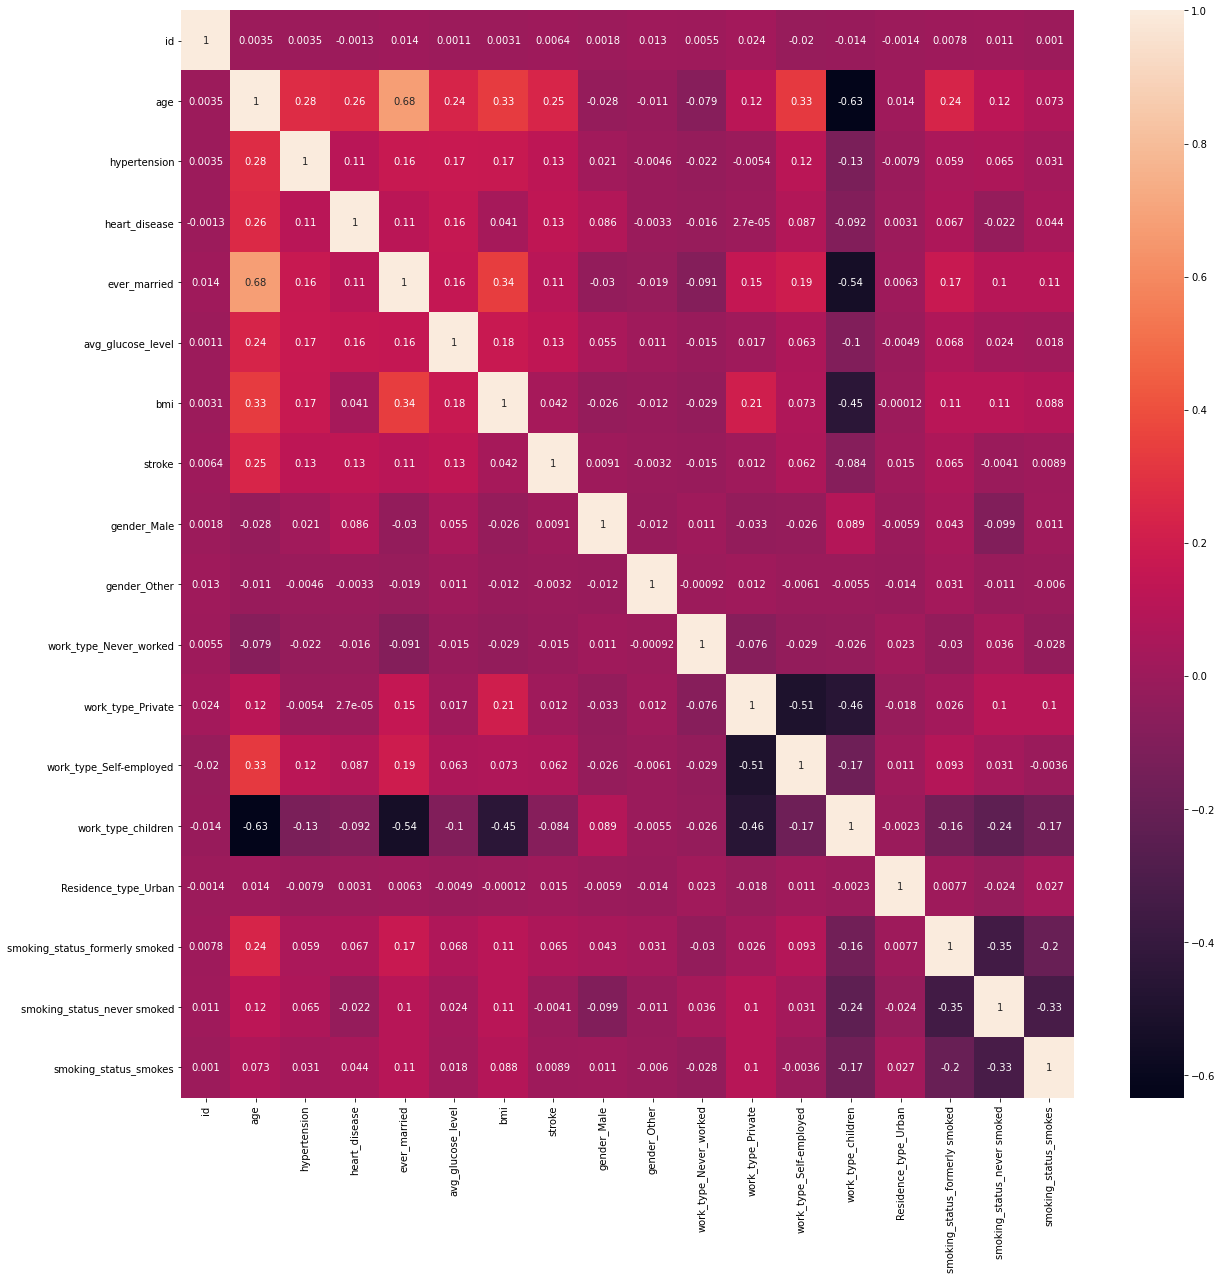

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(st_copy.corr(),annot=True)

In [13]:
st['gender'].value_counts(normalize=True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [36]:
st.loc['gender']='Other'
st['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [40]:
st['gender']=st['gender'].replace('Other','Female')
st['gender'].iloc[:]

0           Male
1         Female
2           Male
3         Female
4         Female
           ...  
5106      Female
5107      Female
5108        Male
5109      Female
gender    Female
Name: gender, Length: 5111, dtype: object

In [33]:
#dropping missing data 
st=st.dropna()

In [34]:
#dropping unnecessary columns
st.drop(columns='id',inplace=True)

In [35]:
#function to observe values in each categorical feature
def value_viz(feature,title):
    return px.pie(st,feature,title=title)

In [36]:
value_viz('gender','Distribution Of Gender')

In [38]:
value_viz('hypertension','Distribution of people with High Blood Pressure')

In [39]:
value_viz('heart_disease','Distribution of People having Heart Disease')

In [40]:
value_viz('ever_married','Distribution of people who are married')

In [41]:
value_viz('work_type','Distribution of people\'s work type')

In [42]:
value_viz('Residence_type','Distribution of where people live')

In [43]:
value_viz('smoking_status','Distribution of people who smoke')

In [44]:
value_viz('stroke','Distribution of people having stroke')

Text(0.5, 1.0, 'Distribution of Age')

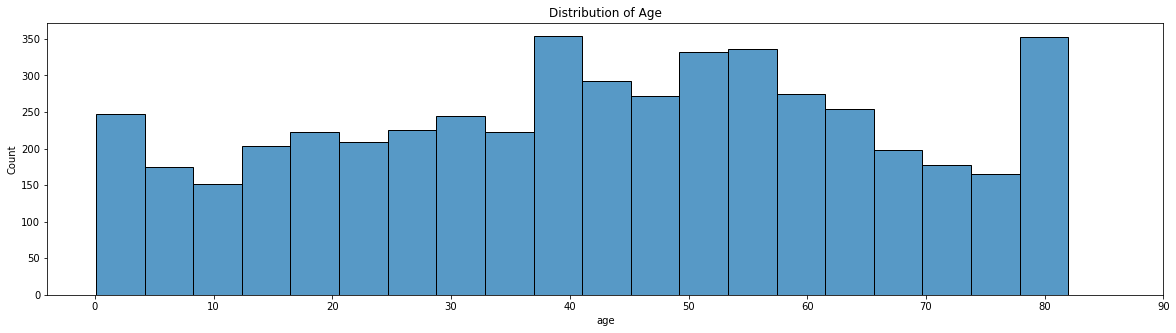

In [45]:
plt.figure(figsize=(20,5))
sns.histplot(st['age'])
plt.xticks(range(0,100,10))
plt.title("Distribution of Age")

([<matplotlib.axis.XTick at 0x20bb8e5ea90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

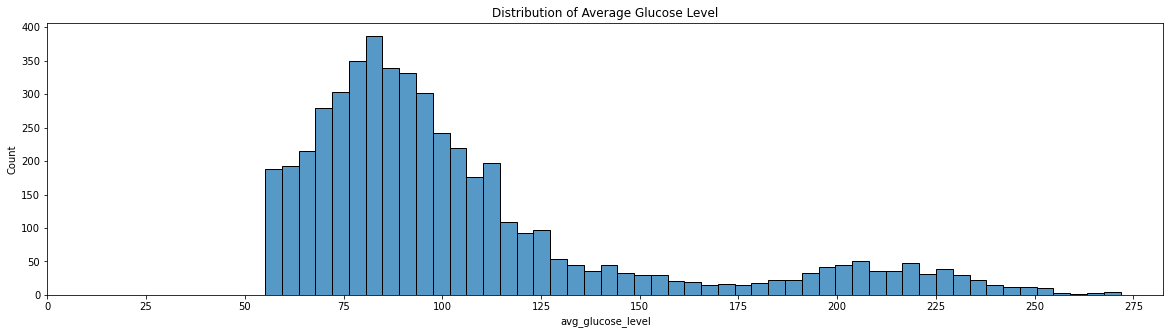

In [46]:
plt.figure(figsize=(20,5))
sns.histplot(st['avg_glucose_level'])
plt.title('Distribution of Average Glucose Level')
plt.xticks(range(0,300,25))

([<matplotlib.axis.XTick at 0x20bb8f28c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

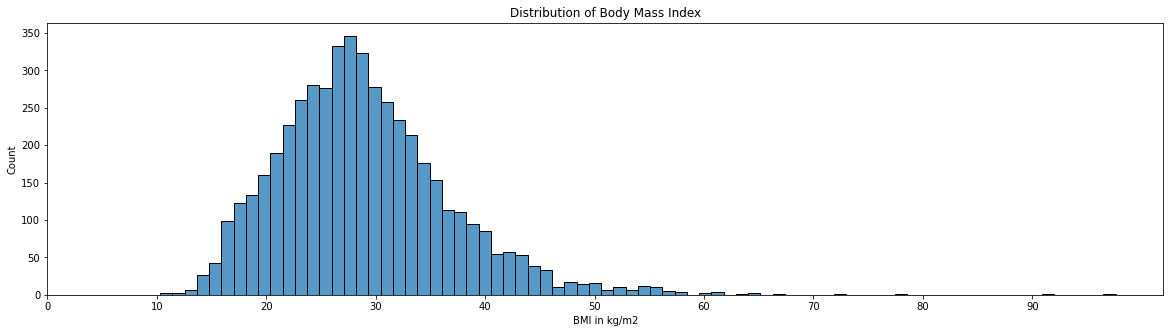

In [47]:
plt.figure(figsize=(20,5))
sns.histplot(st['bmi'])
plt.title('Distribution of Body Mass Index')
plt.xlabel('BMI in kg/m2')
plt.xticks(range(0,100,10))

<AxesSubplot:xlabel='age'>

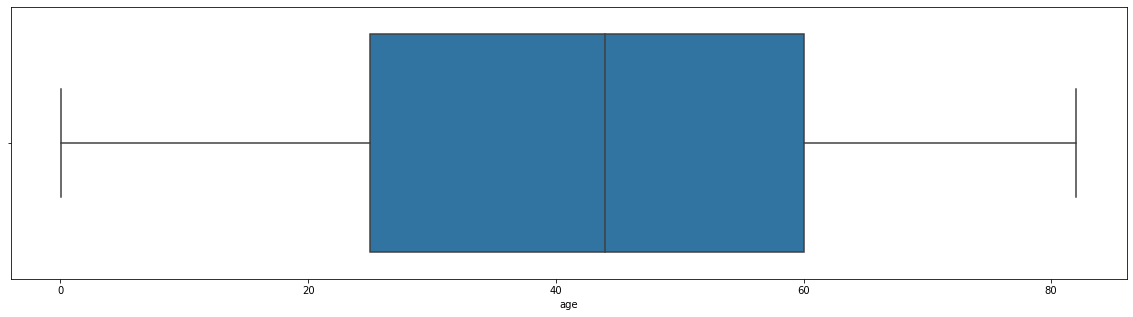

In [48]:
plt.figure(figsize=(20,5))
sns.boxplot(x='age',data=st)

<AxesSubplot:xlabel='bmi'>

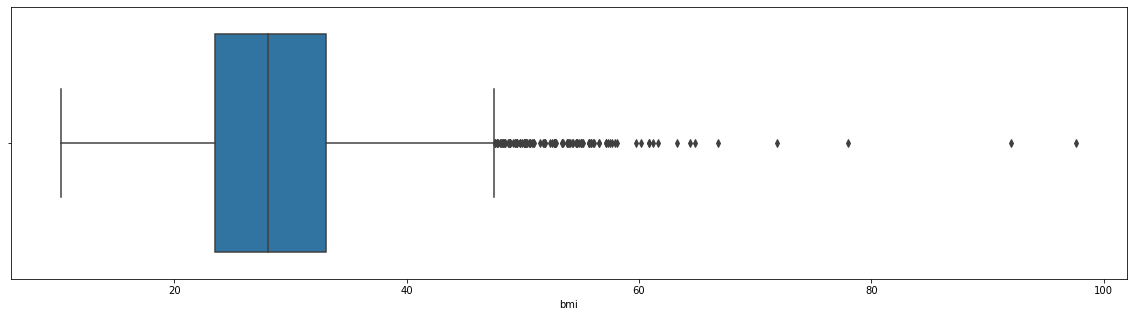

In [49]:
plt.figure(figsize=(20,5))
sns.boxplot(x='bmi',data=st)

<AxesSubplot:xlabel='avg_glucose_level'>

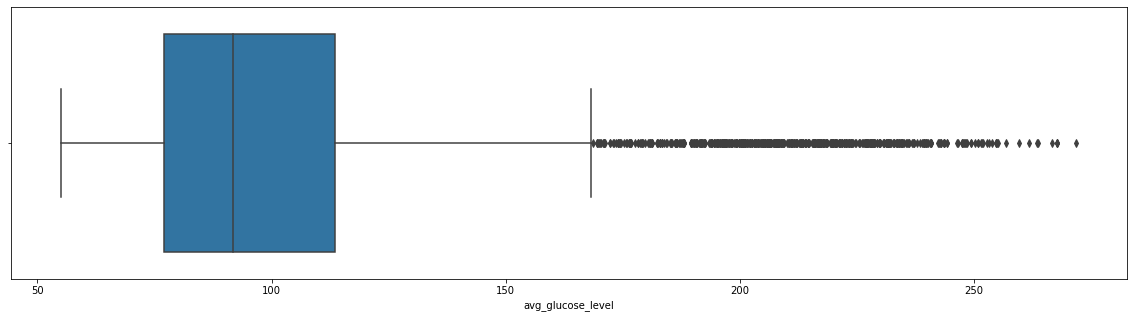

In [50]:
plt.figure(figsize=(20,5))
sns.boxplot(x='avg_glucose_level',data=st)

In [51]:
#function to find outliers
def iqr_outliers(df):
    out=[]
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    return out

In [52]:
d=iqr_outliers(st['bmi'])

In [53]:
#finding minimum of outliers in bmi
d.sort()
d[0]

47.6

In [54]:
e=iqr_outliers(st['avg_glucose_level'])

In [55]:
#finding minimum of outliers in avg_glucose_level
e.sort()
e[0]

168.68

In [56]:
#median imputation in bmi
med=st.bmi.median()
for i in st.bmi:
    if i>=47.6:
        st.bmi=st.bmi.replace(i,med)

In [57]:
#median imputation in avg_glucose_level
med=st.avg_glucose_level.median()
for i in st.avg_glucose_level:
    if i>=168.68:
        st.avg_glucose_level=st.avg_glucose_level.replace(i,med)

In [58]:
st.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,91.489627,28.308800,0.042575
std,22.555115,0.288875,0.216934,21.334273,6.764226,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,101.500000,32.500000,0.000000
max,82.000000,1.000000,1.000000,168.150000,47.500000,1.000000


In [59]:
#hard encoding of feature which have yes or no as values and rest of the values are one hot encoded
st['ever_married']=st['ever_married'].replace({'Yes':1,'No':0})
st=pd.get_dummies(st)

In [60]:
st.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,91.68,36.6,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,1,91.68,34.4,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,1,91.68,24.0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,1,91.68,29.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [61]:
#splitting the original dataset
y=st.stroke
X=st.drop('stroke',axis=1)
X_train_or,X_test_or,Y_train_or,Y_test_or=tts(X,y,test_size=0.25,random_state=27)

In [62]:
#using standard scaler to scale training data and applying it to testing data
sc=StandardScaler()
X_train_scaled_or=sc.fit_transform(X_train_or)
X_test_scaled_or=sc.transform(X_test_or)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1228
           1       0.00      0.00      0.00         0

    accuracy                           0.96      1228
   macro avg       0.50      0.48      0.49      1228
weighted avg       1.00      0.96      0.98      1228



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



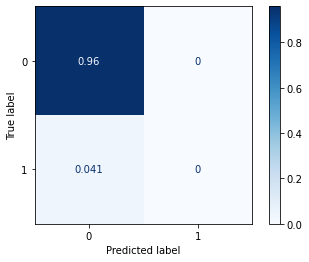

In [88]:
rf=RandomForestClassifier(random_state=25)
rf.fit(X_train_or,Y_train_or)
pred=rf.predict(X_test_scaled_or)
plot_confusion_matrix(rf,X_test_scaled_or,Y_test_or,cmap=plt.cm.Blues,normalize='all')
print(classification_report(pred,Y_test_or))

In [64]:
st['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [65]:
#using SMOTE to generate synthetic examples in target variables 
sm = SMOTE(random_state=27)
X, Y = sm.fit_resample(X, y)

In [66]:
Y.value_counts()

1    4700
0    4700
Name: stroke, dtype: int64

In [67]:
#splitting the transformed dataset
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.25,random_state=27)

In [68]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [69]:
#function to fit models
def model(model):
    mod=model
    mod.fit(X_train_scaled,Y_train)
    mod_pred=mod.predict(X_test_scaled)
    plot_confusion_matrix(mod,X_test_scaled,Y_test,cmap=plt.cm.Blues,normalize='all')
    print(classification_report(mod_pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1277
           1       0.92      0.99      0.95      1073

    accuracy                           0.95      2350
   macro avg       0.95      0.96      0.95      2350
weighted avg       0.96      0.95      0.95      2350



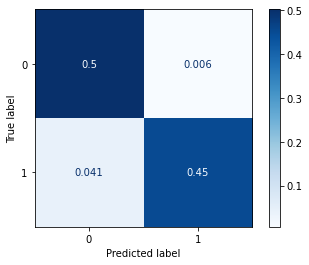

In [70]:
model(LogisticRegression(random_state=25)) 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1176
           1       0.95      0.94      0.94      1174

    accuracy                           0.94      2350
   macro avg       0.94      0.94      0.94      2350
weighted avg       0.94      0.94      0.94      2350



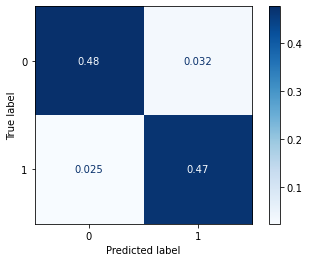

In [90]:
model(DecisionTreeClassifier(random_state=25))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1212
           1       0.96      0.97      0.96      1138

    accuracy                           0.96      2350
   macro avg       0.96      0.96      0.96      2350
weighted avg       0.96      0.96      0.96      2350



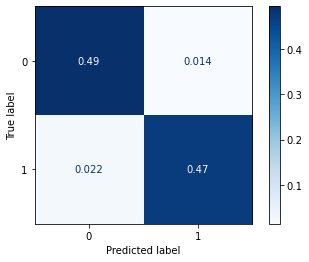

In [72]:
model(KNeighborsClassifier())

[01:16:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1224
           1       0.96      0.98      0.97      1126

    accuracy                           0.97      2350
   macro avg       0.97      0.97      0.97      2350
weighted avg       0.97      0.97      0.97      2350



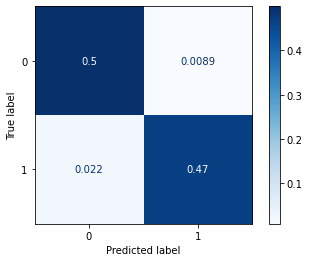

In [73]:
model(XGBClassifier(use_label_encoder=False,random_state=25))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1226
           1       0.96      0.99      0.97      1124

    accuracy                           0.97      2350
   macro avg       0.97      0.97      0.97      2350
weighted avg       0.97      0.97      0.97      2350



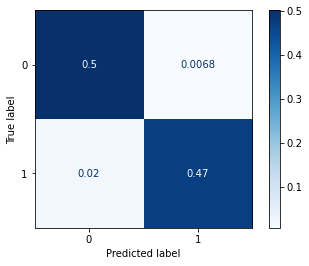

In [74]:
model(RandomForestClassifier(random_state=25)) 

In [ ]:
#https://www.kaggle.com/tmchls/stroke-prediction-modelling
#INSIGHTS-

#Random Forest Classifier had outperformed other classification models.

#With precision=0.99,recall=0.96,f1-score=0.97 for classifying non-stroke cases and precision=0.96,recall=0.99,f1-score=0.97 for classifying stroke cases.

#As False Negative > False Positive for most of the models so recall factor is most important in this classification.

#Random Forest Classifier has correctly predicted 96% of the actual cases where people don't suffer a stroke and 99% of cases where people actually suffer a stroke.

#50% of the positive class data points were correctly classified by the model(True Positive).

#47% of the negative class data points were correctly classified by the model(True Negative).

#0.68% of the negative class data points were incorrectly classified as belonging to the positive class by the model
#(False Positive).
#
#2% of the positive class data points were incorrectly classified as belonging to the negative class by the model(False Negative).